<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Session_3_v1_0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3

* Clustering: K-means Clustering (Customer Segmentation)
* Clustering: Hierarchical (Stock Analysis)
*   Feature Engineering
* Feature Selection
* Metrics (Classification, Regression)



---

Version 1.0

Michael de la Maza

AI/ML

Hult International business School

Adapted from "Approaching (Almost) Any Machine Learning Problem" by Abhishek Thakur

# Clustering: K-means

In [ ]:
# Customer segmentation - Marketing case study

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape

(200, 5)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

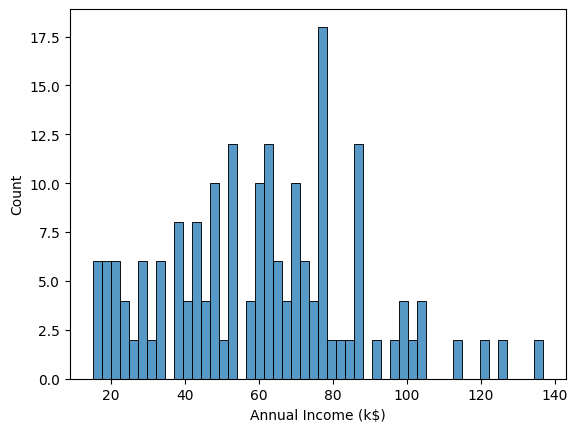

In [ ]:
# Histogram of Annual income

sns.histplot(dataset['Annual Income (k$)'],bins=50)

# What do we see? Most income is between $60K and $90K

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

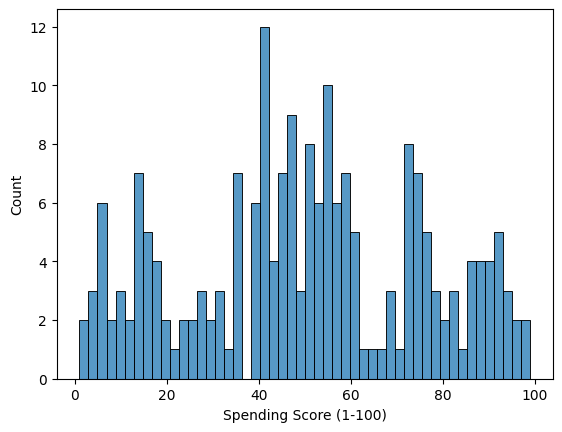

In [ ]:
# Histogram of spending score

sns.histplot(dataset['Spending Score (1-100)'], bins=50)

# What do we see? Most customers have a spending score between 40 and 60

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

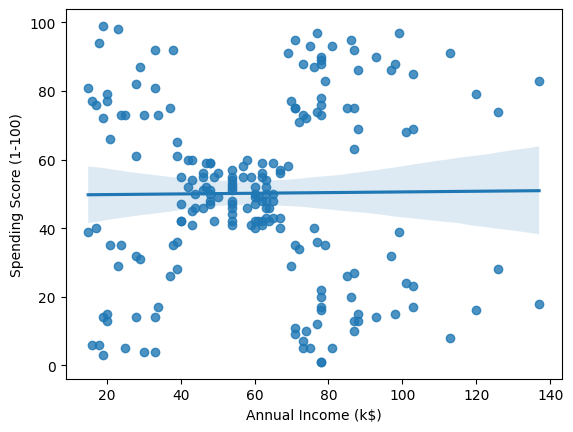

In [ ]:
# Relationship between annual income and spending score
# Regplot produces linear regression

sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataset)

# What does it show? Not much of a relationship!

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

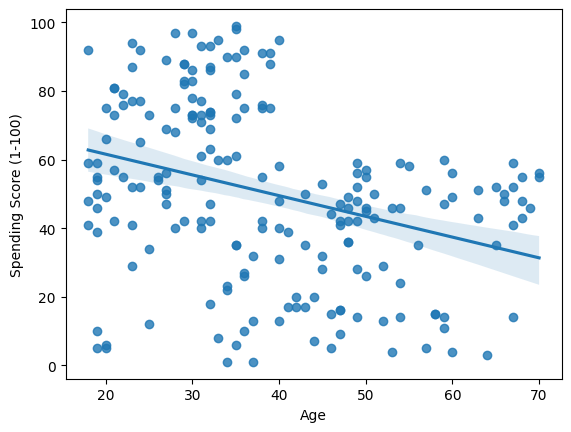

In [ ]:
# Relationship between Age and Spending score

sns.regplot(x="Age", y="Spending Score (1-100)", data=dataset)

# What does it show? Negative relationship!

In [ ]:
# K-means clustering

# Focus on annual income and spending score

dataset = dataset.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis=1)

dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Define object and train

km_model = KMeans(n_clusters = 4, n_init='auto', random_state=42)
km_model.fit(dataset)

print(km_model.cluster_centers_)


[[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]


In [ ]:
# See labels for all samples

print(km_model.labels_)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Text(0, 0.5, 'Spending Score')

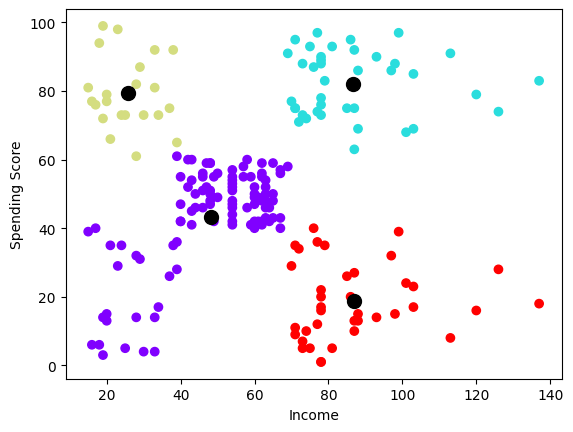

In [ ]:
# Visualize
# Data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# Centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

plt.xlabel('Income')
plt.ylabel('Spending Score')

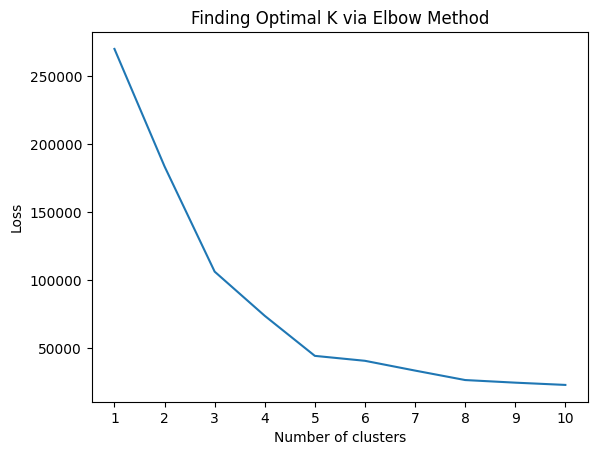

In [ ]:
# Select K using elbow method

# Search K from 1 to 10

loss = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, n_init='auto', random_state=42).fit(dataset)
  loss.append(km.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1,11), loss)
plt.title("Finding Optimal K via Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.xticks(range(1, 11))
plt.show()

# What is the best K?

Text(0, 0.5, 'Spending Score')

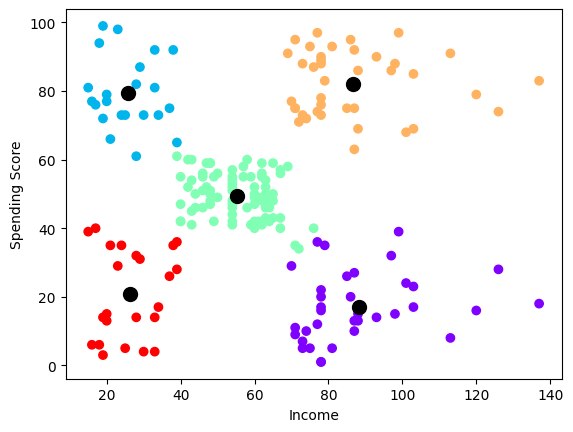

In [ ]:
# Redo with K=5

km_model = KMeans(n_clusters = 5, n_init='auto')
km_model.fit(dataset)

# Visualize
# Data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# Centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

plt.xlabel('Income')
plt.ylabel('Spending Score')

In [ ]:
# Which customers belong to the high income, high spending score cluster?

print(km_model.cluster_centers_)
print(km_model.labels_)

dataset = pd.read_csv('Mall_Customers.csv')

dataset_labels = dataset

dataset_labels['label'] = km_model.labels_

dataset_labels

# High income/high spending score cluster = 86.5, 82.1

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [ ]:
# 5 minute exercise

# After listening to your analysis, one of your colleagues suggests a different approach.
# Instead of focusing on high income/high spending score customers, focus on
# high income/low spending customers and encourage them to increase spending.

# What cluster corresponds to high income/low spending in the graph above?
# What is the cluster number? What are the values for income and spending score?
# How many people are in this cluster?





In [ ]:
cluster_centers = km_model.cluster_centers_

# Identify the cluster with high income and low spending
# By observing the cluster_centers, the first cluster (index 0) has a high income (~88.2) and low spending (~17.1)
# This corresponds to the cluster 0 (since Python lists are 0-indexed)

high_income_low_spending_cluster_index = 0
cluster_number = high_income_low_spending_cluster_index
income_value = cluster_centers[cluster_number][0]
spending_score_value = cluster_centers[cluster_number][1]

# Count the number of people in this cluster
num_people_in_cluster = dataset_labels[dataset_labels['label'] == cluster_number].shape[0]

print(f"Cluster corresponding to high income/low spending: Cluster {cluster_number}")
print(f"Values for income and spending score: Annual Income (k$) = {income_value:.1f}, Spending Score (1-100) = {spending_score_value:.1f}")
print(f"Number of people in this cluster: {num_people_in_cluster}")

Cluster corresponding to high income/low spending: Cluster 0
Values for income and spending score: Annual Income (k$) = 88.2, Spending Score (1-100) = 17.1
Number of people in this cluster: 35


## Hierarchical clustering: Pharmaceutical companies

In [ ]:
# load dataset
pharma_df = pd.read_csv('Pharmaceuticals.csv')
pharma_df.set_index('Symbol', inplace=True)
pharma_df

,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE


In [ ]:
# Drop columns that are not of interest for this analysis

pharma_data = pharma_df.drop(columns=['Name', 'Median_Recommendation', 'Location', 'Exchange'])
pharma_data

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
BAY,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
BMY,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
CHTT,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
ELN,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3


In [ ]:
# Standardize values - z score. Example of feature engineering.
from sklearn import preprocessing

pharma_norm = pharma_data.apply(preprocessing.scale, axis=0)
pharma_norm.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
AGN,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
AHM,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
AZN,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
AVE,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [45.0, 45.0, 77.5, 77.5],
  [20.0, 20.0, 61.25, 61.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [145.0, 145.0, 175.0, 175.0],
  [122.5, 122.5, 160.0, 160.0],
  [40.625, 40.625, 141.25, 141.25]],
 'dcoord': [[0.0,
   np.float64(1.8589855416010153),
   np.float64(1.8589855416010153),
   0.0],
  [0.0, np.float64(2.5076101116912684), np.float64(2.5076101116912684), 0.0],
  [np.float64(1.8589855416010153),
   np.float64(3.123036261199772),
   np.float64(3.123036261199772),
   np.float64(2.5076101116912684)],
  [0.0, np.float64(1.1072024253316444), np.float64(1.10720242533164

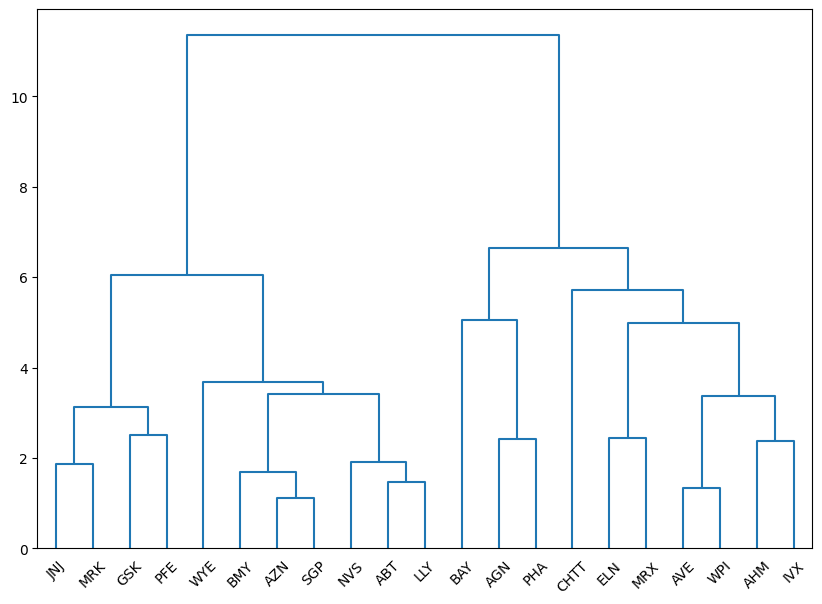

In [ ]:
# Create dendogram
# Scipy for scientific computing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Create dendogram
Z = linkage(pharma_norm, method='ward')

# Plot dendogram
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), squeeze=False)
ax = axes[0,0]
#dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
dendrogram(Z, color_threshold=0, ax=ax, labels=pharma_norm.index)



In [ ]:
# Assign a cluster number to each data point
memb = fcluster(Z, 4, criterion='maxclust')



In [ ]:
# What companies are in which clusters?

# Utility code
# Create a dictionary to store original indices for each cluster
cluster_indices = {}
for i, cluster in enumerate(memb):
  if cluster not in cluster_indices:
    cluster_indices[cluster] = []
  cluster_indices[cluster].append(pharma_data.index[i])

# Print cluster number and original indices
for cluster, indices in cluster_indices.items():
  print(f"\nCluster {cluster}:")
  print(indices)


Cluster 2:
['ABT', 'AZN', 'BMY', 'LLY', 'NVS', 'SGP', 'WYE']

Cluster 3:
['AGN', 'BAY', 'PHA']

Cluster 4:
['AHM', 'AVE', 'CHTT', 'ELN', 'IVX', 'MRX', 'WPI']

Cluster 1:
['GSK', 'JNJ', 'MRK', 'PFE']


In [ ]:
# Show average values for each cluster

cluster_data = {}
for key, item in pharma_data.groupby(memb):
    cluster_data['Cluster {}'.format(key)] = item.mean()

pd.DataFrame(cluster_data).round(2)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Market_Cap,157.02,62.88,26.91,8.82
Beta,0.48,0.41,0.64,0.62
PE_Ratio,22.22,20.23,55.63,19.61
ROE,44.42,30.71,10.10,16.96
ROA,17.70,13.39,4.20,6.24
Asset_Turnover,0.95,0.71,0.70,0.54
Leverage,0.22,0.39,0.32,1.11
Rev_Growth,18.53,5.38,7.00,21.14
Net_Profit_Margin,19.58,20.51,5.13,13.19


In [ ]:
# 5 minute exercise

# Describe each cluster
# Cluster 1: Large (market cap), fast growing (Rev_growth), highly profitable (Net_profit_margin)


* **Market cap (size)**
* **Revenue growth**
* **Net profit margin (profitability)**

## **Cluster 1**

**['GSK', 'JNJ', 'MRK', 'PFE']**

**Profile:**

* **Very large market cap** (global pharma giants)
* **Moderate to low revenue growth** (mature portfolios, slower expansion)
* **Very high profitability** (strong margins, blockbuster drugs, scale efficiency)

**Interpretation:**
This cluster represents **established, defensive pharma leaders**. Growth is steady rather than explosive, but margins are consistently strong due to pricing power, diversification, and operational scale.

---

## **Cluster 2**

**['ABT', 'AZN', 'BMY', 'LLY', 'NVS', 'SGP', 'WYE']**

**Profile:**

* **Large market cap**
* **Moderate to high revenue growth**
* **High profitability**

**Interpretation:**
These firms balance **scale and growth**. Compared to Cluster 1, they tend to have **more active pipelines or expanding therapeutic areas**, leading to faster revenue growth while maintaining strong margins.

---

## **Cluster 3**

**['AGN', 'BAY', 'PHA']**

**Profile:**

* **Mid to large market cap**
* **High revenue growth**
* **Moderate profitability**

**Interpretation:**
This cluster reflects **growth-oriented pharma companies**. They are expanding revenues quickly (often via innovation or acquisitions) but profitability is slightly lower, likely due to **higher R&D, integration costs, or competitive pressure**.

---

## **Cluster 4**

**['AHM', 'AVE', 'CHTT', 'ELN', 'IVX', 'MRX', 'WPI']**

**Profile:**

* **Small to mid market cap**
* **High to very high revenue growth**
* **Low to moderate profitability**

**Interpretation:**
These are **emerging or niche players**. Growth is rapid, but margins are weaker due to **limited scale, higher costs, or early-stage business models**. Higher risk, higher potential upside.

---

### **Big Picture Summary**

* **Cluster 1:** Mature, highly profitable incumbents
* **Cluster 2:** Large, profitable firms with stronger growth engines
* **Cluster 3:** Growth-focused mid/large firms trading margin for expansion
* **Cluster 4:** Smaller, fast-growing but less profitable companies



# Feature Engineering

In [ ]:
# Create dataframe with random values for two features

import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(100,2), columns=['f_1','f_2'])

df.head()

,f_1,f_2
0,0.111066,0.902201
1,0.831330,0.912230
2,0.959062,0.338063
3,0.051124,0.898765
4,0.653935,0.918936


In [ ]:
# Create polynomial features. Similar to what we did in linear regression.

from sklearn import preprocessing

pf = preprocessing.PolynomialFeatures(
    degree = 2, # [1, a, b, a^2, ab, b^2]
    include_bias=False
)

# apply to the features
pf.fit(df)

# create polynomial features and create new dataframe
poly_feats = pf.transform(df)

# Get number of features
num_feats = poly_feats.shape[1]

df_transformed = pd.DataFrame(poly_feats, columns=[f'f_{i}' for i in range(1,num_feats+1)])

df_transformed.head()

# Can create third-degree, fourth-degree, etc. polynomial features

,f_1,f_2,f_3,f_4,f_5
0,0.111066,0.902201,0.012336,0.100204,0.813967
1,0.831330,0.912230,0.691109,0.758364,0.832163
2,0.959062,0.338063,0.919799,0.324223,0.114287
3,0.051124,0.898765,0.002614,0.045949,0.807779
4,0.653935,0.918936,0.427632,0.600925,0.844443


In [ ]:
# Binning continuous features
# Binning can be used to 'convert' continuous features to categorical (e.g., temperature)

df["f1_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
df["f1_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)

df.head()

,f_1,f_2,f1_bin_10,f1_bin_100
0,0.111066,0.902201,0,8
1,0.831330,0.912230,8,83
2,0.959062,0.338063,9,96
3,0.051124,0.898765,0,2
4,0.653935,0.918936,6,65


# Feature Selection

In [ ]:
# Eliminate highly correlated features - collinearity

import pandas as pd

from sklearn.datasets import fetch_california_housing

# California housing is a dataset that is good for regression
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

df = pd.DataFrame(X, columns=col_names)

# Add a highly correlated feature
# So that you can see that it does not get selected

df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [ ]:
# Use Recursive Feature Elimination (RFE) to select features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=5)

rfe.fit(X, y)

X_transformed = rfe.transform(X)

# Which features were selected?
selected_features_mask = rfe.support_
selected_features_names = [col_names[i] for i in range(len(col_names)) if selected_features_mask[i]]

print(selected_features_names)



['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


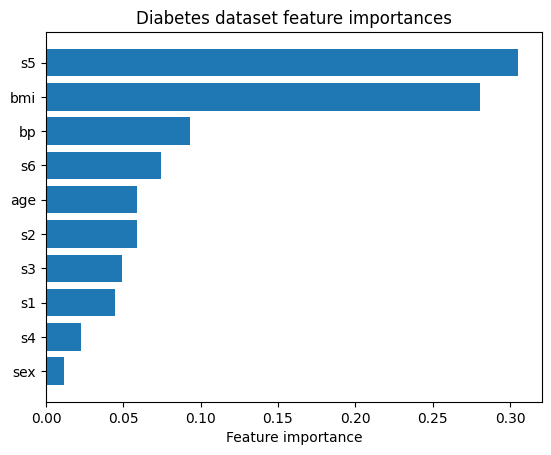

In [ ]:
# Use importances to select features for decision tree
# importance: higher the score the better
# The more a feature is chosen and the better it does of splitting (reducing impurity), the higher the importance
# diabetes dataset (regression): predict disease progression after one year

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()

model.fit(X,y)


#plot importance
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Diabetes dataset feature importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Feature importance')
plt.show()



In [ ]:
# Use SelectFromModel, a very sophisticated general function
# Can be used for both regressors and classifiers

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model)
X_transformed=sfm.fit_transform(X,y)

selected_features_mask = sfm.get_support()

selected_features_names = [col_names[i] for i in range(len(col_names)) if selected_features_mask[i]]

print(selected_features_names)

# Note that it matches the above!


['bmi', 's5']


# Metrics

## Classification

In [ ]:
# Accuracy: Returns percent accuracy
# Does not focus on error checking

def accuracy(y_true, y_pred):
  correct = 0

  for yt, yp in zip(y_true, y_pred):
    if yt == yp: correct += 1

  return correct / len (y_true)

In [ ]:
# Compare accuracy to sklearn accuracy

from sklearn import metrics

y1 = [0,0,1,0,0,1,0,1]
y2 = [1,1,0,1,1,1,0,1]

print(metrics.accuracy_score(y1,y2))
print(accuracy(y1,y2))

0.375
0.375


In [ ]:
# True positive, true negative, false positive, and false negative are 'foundational'
# They can be combined in various ways to create other metrics, such as recall, precision, F1

def true_positive (y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 1) and (yp == 1):
      tp+=1

  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 0) and (yp == 0):
      tn+=1

  return tn

# predict positive (1), but actually negative (0)
def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 0) and (yp == 1):
      fp+=1

  return fp

# predict negative (0), but actually positive (1)
def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if (yt == 1) and (yp == 0):
      fn+=1

  return fn




In [ ]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

# Before running the code, what are the answers?

print(true_positive(l1, l2))
print(false_positive(l1,l2))
print(false_negative(l1,l2))
print(true_negative(l1,l2))

2
1
2
3


In [ ]:
# Note that accuracy = (tp+tn)/(tp+tn+fp+fn)

def accuracy_v2(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)

  accuracy_score = (tp + tn)/(tp + tn + fp + fn)

  return accuracy_score

In [ ]:
# Compare accuracy, accuracy_v2, scikit accuracy

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(accuracy(l1,l2))
print(accuracy_v2(l1,l2))
print(metrics.accuracy_score(l1,l2))


0.625
0.625
0.625


In [ ]:
# Precision = TP / (TP + FP)
# Think: Of all the results that the system returns as positive, what percent are positive?
# Application: Google search

def precision(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)

  precision = tp / (tp+fp)

  return precision

In [ ]:
# Test precision

# Before running the code, what do you think the answer is?

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(precision(l1,l2))

0.6666666666666666


In [ ]:
# Recall = tp/(tp+fn)
# Think: of all of the positive results, what percentage does the system return?
# Application: Google search

def recall(y_true, y_pred):

  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall


In [ ]:
# Test recall

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

# What do you think the answer is?

print(recall(l1,l2))

0.5


In [ ]:
# F1: Combines both precision and recall into one metric
# The goal is to have high precision and recall metrics
# F1 = 2*P*R/(P + R)
# F1 = 2*TP / (2*TP + FP + FN)

def f1(y_true, y_pred):

  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)

  f1_score = 2*p*r / (p + r)

  return f1_score

In [ ]:
#Test F1

y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0]
y_pred = [0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0]

print(f1(y_true, y_pred))
print(metrics.f1_score(y_true,y_pred))

0.28571428571428575
0.2857142857142857


In [ ]:
# True Positive Rate: same as recall

def tpr(y_true, y_pred):
  return recall(y_true, y_pred)

In [ ]:
# False Positive Rate (FPR):  the percentage of negative cases that are incorrectly classified as positive
# FPR = FP / (TN + FP)
# Want this to be as small as possible
# Example: spam filter

def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)

  return fp / (tn + fp)




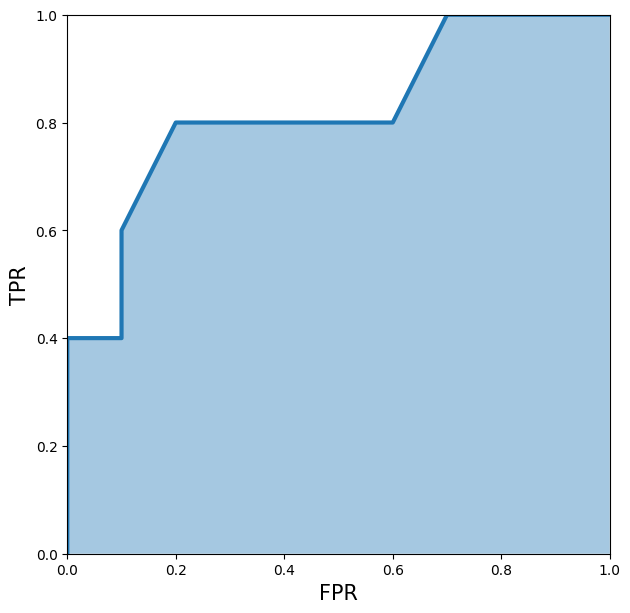

In [ ]:
# AUC - Area Under Curve

tpr_list = []
fpr_list = []

y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.99,1.0]

#loop over thresholds
for thresh in thresholds:
  temp_pred = [1 if x>= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()




In [ ]:
# What is the AUC?
# It is the area under the curve - the dark area
# Perfect algorithm: AUC = 1
# Random algorithm: AUC = 0.5

metrics.roc_auc_score(y_true, y_pred)

np.float64(0.8300000000000001)

In [ ]:
# The End